## BackTest: 이동평균선 모델의 수익성 검증

### 데이터 수집

In [1]:
from DataFetcher.Duration import Duration

duration = Duration(start="2015-01-01T00:00", end="2023-08-01T12:00", batch_size=1000, interval="DAY")

#### 최초 실행

In [1]:
from DataFetcher.DataFetcher import DataFetcher
from DataFetcher.Duration import Duration

duration = Duration(start="2023-01-01T00:00", end="2023-08-01T12:00", batch_size=1000, interval="DAY")
dataFetcher = DataFetcher()

data = dataFetcher.get_bitcoin_candle(duration=duration)
# data_mal = data.copy()
data
# data_mal.to_csv(f"./data/{str(duration.start).split()[0]}~{str(duration.end).split()[0]}.csv", encoding="utf8", index=None)

fetching 2022-12-31T15:00:00+09:00 ~ 2023-08-01T03:00:00+09:00...

,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count
0,2023-01-01T09:00:00.0000000Z,2023-01-02T09:00:00.0000000Z,2023-01-01T09:00:30.0000000Z,2023-01-02T08:59:33.0000000Z,16530.0,16622.0,16496.0,16615.0,473.832738,11301
1,2023-01-02T09:00:00.0000000Z,2023-01-03T09:00:00.0000000Z,2023-01-02T09:00:23.0000000Z,2023-01-03T08:59:47.0000000Z,16615.0,16782.0,16552.0,16673.0,1046.658437,9780
2,2023-01-03T09:00:00.0000000Z,2023-01-04T09:00:00.0000000Z,2023-01-03T09:00:27.0000000Z,2023-01-04T08:59:51.0000000Z,16668.0,16766.0,16605.0,16670.0,1388.071966,11861
3,2023-01-04T09:00:00.0000000Z,2023-01-05T09:00:00.0000000Z,2023-01-04T09:00:39.0000000Z,2023-01-05T08:59:41.0000000Z,16673.0,16984.0,16652.0,16849.0,2038.030123,15672
4,2023-01-05T09:00:00.0000000Z,2023-01-06T09:00:00.0000000Z,2023-01-05T09:00:05.0000000Z,2023-01-06T08:59:29.0000000Z,16847.0,16871.0,16755.0,16826.0,1129.003529,10216
...,...,...,...,...,...,...,...,...,...,...
207,2023-07-27T09:00:00.0000000Z,2023-07-28T09:00:00.0000000Z,2023-07-27T09:00:26.0000000Z,2023-07-28T08:58:44.0000000Z,29353.0,29563.0,29081.0,29219.0,1313.643708,11605
208,2023-07-28T09:00:00.0000000Z,2023-07-29T09:00:00.0000000Z,2023-07-28T09:00:04.0000000Z,2023-07-29T08:59:59.0000000Z,29214.0,29525.0,29121.0,29317.0,1241.477541,8491
209,2023-07-29T09:00:00.0000000Z,2023-07-30T09:00:00.0000000Z,2023-07-29T09:00:03.0000000Z,2023-07-30T08:59:43.0000000Z,29316.0,29404.0,29251.0,29360.0,402.062376,5460
210,2023-07-30T09:00:00.0000000Z,2023-07-31T09:00:00.0000000Z,2023-07-30T09:00:04.0000000Z,2023-07-31T08:59:46.0000000Z,29360.0,29446.0,29034.0,29279.0,792.178886,7460


In [6]:
from datetime import datetime

s = "2023-01-01T00:00:00.0000000Z"
s.split('.')[0]
datetime.strptime(s.split('.')[0], "%Y-%m-%dT%H:%M:%S")

datetime.datetime(2023, 1, 1, 0, 0)

#### csv 로드

In [2]:
import pandas as pd

data_mal = pd.read_csv("./data/2015-01-01~2023-08-01.csv", encoding="utf8")

### 이동평균선 모델 불러오기

In [3]:
from models.MAL import MAL_model

model = MAL_model(data_mal, duration, target_label="price_close", timestamp_label="time_period_start")

In [4]:
model.add_mal(inplace=True)

,Unnamed: 0,time_period_start,time_period_end,time_open,time_close,price_open,price_high,price_low,price_close,volume_traded,trades_count,MAL_5DAY,MAL_20DAY,MAL_60DAY,MAL_120DAY,MAL_240DAY
0,0,2015-01-01T00:00:00.0000000Z,2015-01-02T00:00:00.0000000Z,2015-01-01T00:00:22.3630000Z,2015-01-01T23:59:00.9170000Z,321.00,321.00,312.60,313.81,3087.436554,2350,NaN,NaN,NaN,NaN,NaN
1,1,2015-01-02T00:00:00.0000000Z,2015-01-03T00:00:00.0000000Z,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0,NaN,NaN,NaN,NaN,NaN
2,2,2015-01-03T00:00:00.0000000Z,2015-01-04T00:00:00.0000000Z,2015-01-03T00:00:08.1130000Z,2015-01-03T23:59:59.5700000Z,315.42,316.58,280.00,282.00,21752.719146,10301,NaN,NaN,NaN,NaN,NaN
3,3,2015-01-04T00:00:00.0000000Z,2015-01-05T00:00:00.0000000Z,2015-01-04T00:00:01.1170000Z,2015-01-04T23:58:36.2400000Z,280.00,289.39,255.00,264.00,41441.278553,16535,NaN,NaN,NaN,NaN,NaN
4,4,2015-01-05T00:00:00.0000000Z,2015-01-06T00:00:00.0000000Z,2015-01-05T00:00:12.3170000Z,2015-01-05T09:12:25.6470000Z,264.55,280.00,264.07,276.80,9528.271002,4321,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3127,3127,2023-07-28T00:00:00.0000000Z,2023-07-29T00:00:00.0000000Z,2023-07-28T00:00:04.8330000Z,2023-07-28T23:59:59.0390000Z,29214.00,29525.00,29121.00,29317.00,1241.477541,8491,29258.2,29988.25,NaN,NaN,NaN
3128,3128,2023-07-29T00:00:00.0000000Z,2023-07-30T00:00:00.0000000Z,2023-07-29T00:00:03.9510000Z,2023-07-29T23:59:43.2670000Z,29316.00,29404.00,29251.00,29360.00,402.062376,5460,29294.8,29947.90,NaN,NaN,NaN
3129,3129,2023-07-30T00:00:00.0000000Z,2023-07-31T00:00:00.0000000Z,2023-07-30T00:00:04.1890000Z,2023-07-30T23:59:46.9640000Z,29360.00,29446.00,29034.00,29279.00,792.178886,7460,29305.8,29890.80,NaN,NaN,NaN
3130,3130,2023-07-31T00:00:00.0000000Z,2023-08-01T00:00:00.0000000Z,2023-07-31T00:00:02.1530000Z,2023-07-31T23:59:28.4230000Z,29279.00,29511.00,29115.00,29231.00,899.870884,8819,29281.2,29821.30,NaN,NaN,NaN


<Axes: >

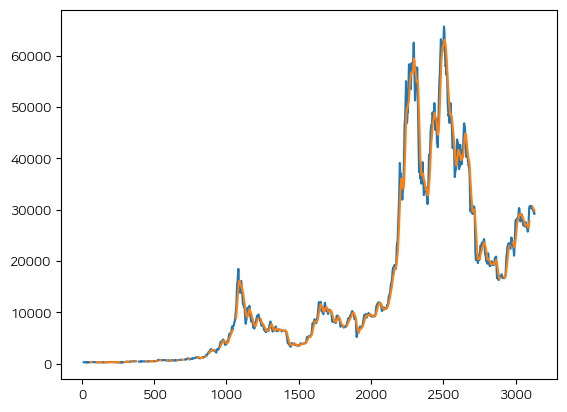

In [6]:
model.data["MAL_5DAY"].plot()
model.data["MAL_20DAY"].plot()

In [26]:
from datetime import timedelta

pd.to_datetime(model.data["time_period_start"], utc=True, format="ISO8601") + timedelta(hours=9)

0      2015-01-01 09:00:00+00:00
1      2015-01-02 09:00:00+00:00
2      2015-01-03 09:00:00+00:00
3      2015-01-04 09:00:00+00:00
4      2015-01-05 09:00:00+00:00
                  ...           
3127   2023-07-28 09:00:00+00:00
3128   2023-07-29 09:00:00+00:00
3129   2023-07-30 09:00:00+00:00
3130   2023-07-31 09:00:00+00:00
3131   2023-08-01 09:00:00+00:00
Name: time_period_start, Length: 3132, dtype: datetime64[ns, UTC]

In [22]:
model.data["time_period_start"]

0      2015-01-01 00:00:00+00:00
1      2015-01-02 00:00:00+00:00
2      2015-01-03 00:00:00+00:00
3      2015-01-04 00:00:00+00:00
4      2015-01-05 00:00:00+00:00
                  ...           
3127   2023-07-28 00:00:00+00:00
3128   2023-07-29 00:00:00+00:00
3129   2023-07-30 00:00:00+00:00
3130   2023-07-31 00:00:00+00:00
3131   2023-08-01 00:00:00+00:00
Name: time_period_start, Length: 3132, dtype: datetime64[ns, UTC]

In [ ]:
model.predict(target_time=, cross_duration=2)

In [7]:
test_duration = Duration(start="2015-03-01T00:00", end="2023-08-01T12:00", batch_size=1, interval="DAY")

In [15]:
i, j = next(test_duration)

model.predict(target_time=i)

ValueError: 2020-08-23T00:00:00+09:00이 타임스탬프 라벨 time_period_start에 없습니다.

In [ ]:
from models.AbstractModel import BasicModel
from typing import Literal


class BackTest():
    def __init__(
            self,
            data: pd.DataFrame,
            model: BasicModel,
            duration: Duration,
            fee: float=0.05 / 100,
            seed_money: int=50_000,
            strategy: Literal["fixed"]="fixed",
            ):

        self.model = model
        self.data = data
        self.fee = fee
        self.duration = duration
        self.current_money = seed_money
        self.strategy = strategy


    def do_test(self):
        for time in duration:
            if 